# **Project 2**

# Introduction: 

Real estate agents can use this machine learning algorithm to determine the market worth of properties.
Despite the pandemic, real estate prices have been rising significantly throughout the years. This may be due to factors like inflation and profitable real estate investments. The COVID 19 epidemic has altered many facets of our life, most notably how we work. As client-real estate agent contact has decreased, the real estate industry has been severely impacted. Nowadays, it's customary and highly acceptable for clients to conduct virtual viewings before expressing further interest.

Clients frequently expect realtors to provide quick back-of-the-envelope estimates of market value based on experience and market transactions in this age of digitization when efficiency comes at a cost. A thorough evaluation by a valuer requires some time and is frequently completed only when the buyer is prepared to commit. The estimation then forms the foundation of the negotiation with the seller. Expectations are not met and loan approval may be impacted when the actual valuation differs from the initial estimate, potentially resulting in deal loss.

Source: https://www.globalpropertyguide.com/North-America/United-States/Price-History
        https://www.bbc.com/news/business-57090421


# Problem Statement:

In this project, we would be making three supervised machine learning models; Linear Regression model, Ridge Regression model and Lasso regression model, using train data to test the model against the test data to predict the property sale price. 
Success of the model is determined by the Root Mean squared error (RMSE), which is the standard deviation of the residuals (prediction errors). Lower RMSE would determine a better model. The main objective of this model is to set a predicted valuation/price of a property in line with the market perceived value of the property, allowing valuators to set a fair price for the property and hence fair property taxes for everyone who would be paying property tax.


# Data:

- train.csv -- this data contains all of the training data for your model.
  The target variable (SalePrice) is removed from the test set!
- test.csv -- this data contains the test data for your model. You will feed this data into your regression model to make predictions.



# Importing Data and Packages

In [1]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as mp

# Libraries to use for Linear Regression Modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline 

In [2]:
ames_train = pd.read_csv('../datasets/train.csv')
ames_test = pd.read_csv('../datasets/test.csv')

In [3]:
ames_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
# Increase display range for easier viewing - https://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/
pd.options.display.max_columns = 400
pd.options.display.max_rows = 300 

Taking a look at the basic information of the train dataset

In [5]:
ames_train.head(5)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
ames_train.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
ames_train.shape

(2051, 81)

In [8]:
ames_train.info

<bound method DataFrame.info of         Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      109  533352170           60        RL           NaN     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2046  1587  921126030           20        RL          79.0     11449   Pave   
2047   785  905377130           30        RL           NaN     12342   Pave   
2048   916  909253010           50        RL          57.0      7558   Pave   
2049   639  535179160           20        RL          80.0     10400   Pave   
2050    10  527162130           60        RL          60.0      7500   Pave   

     Alley Lot Shap

In [9]:
ames_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

Taking a look at the basic information of the test dataset

In [10]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [11]:
ames_test.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [12]:
ames_test.info

<bound method DataFrame.info of        Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0    2658  902301120          190        RM          69.0      9142   Pave   
1    2718  905108090           90        RL           NaN      9662   Pave   
2    2414  528218130           60        RL          58.0     17104   Pave   
3    1989  902207150           30        RM          60.0      8520   Pave   
4     625  535105100           20        RL           NaN      9500   Pave   
..    ...        ...          ...       ...           ...       ...    ...   
873  1662  527377110           60        RL          80.0      8000   Pave   
874  1234  535126140           60        RL          90.0     14670   Pave   
875  1373  904100040           20        RL          55.0      8250   Pave   
876  1672  527425140           20        RL          60.0      9000   Pave   
877  1939  535327160           20        RL          70.0      8400   Pave   

    Alley Lot Shape Land Contou

In [13]:
ames_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [14]:
ames_test.shape

(878, 80)

# Data Cleaning:

1. Formatting the columns to lowercase

In [15]:
ames_train.columns = [i.lower().replace(' ','_') for i in ames_train.columns]

In [16]:
ames_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [17]:
ames_test.columns = [i.lower().replace(' ','_') for i in ames_test.columns]

In [18]:
ames_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.0,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.0,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.0,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.0,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.0,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [19]:
ames_train[ames_train.duplicated()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


In [20]:
# Checking which column with at least one null
ames_train.isnull().sum()[ames_train.isnull().sum()>0]

lot_frontage       330
alley             1911
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
pool_qc           2042
fence             1651
misc_feature      1986
dtype: int64

In [21]:
ames_test.isnull().sum()[ames_test.isnull().sum()>0]

lot_frontage      160
alley             820
mas_vnr_type        1
mas_vnr_area        1
bsmt_qual          25
bsmt_cond          25
bsmt_exposure      25
bsmtfin_type_1     25
bsmtfin_type_2     25
electrical          1
fireplace_qu      422
garage_type        44
garage_yr_blt      45
garage_finish      45
garage_qual        45
garage_cond        45
pool_qc           874
fence             706
misc_feature      837
dtype: int64

Based on the intial null finding, can deduce that pool qc are not significant enough due to too little data and. Therefore, pool qc and pool area will be drop.

In [22]:
ames_train1 = ames_train.drop(columns=['pool_qc','pool_area'])

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,NaN,Elev,17000,10,2007,New,183850


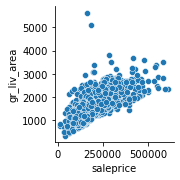

In [23]:
# Removing outliers as suggested by http://jse.amstat.org/v19n3/decock/DataDocumentation.txt 
sns.pairplot(ames_train1,y_vars = ['gr_liv_area'], x_vars = ['saleprice']);
ames_train1[ames_train1['gr_liv_area']>3999]

In [24]:
ames_train2 = ames_train1[ames_train1['gr_liv_area']<4000]
ames_train2

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NaN,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,A

In [25]:
ames_train2.isnull().sum()[ames_train2.isnull().sum()>0]

lot_frontage       330
alley             1909
mas_vnr_type        22
mas_vnr_area        22
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu      1000
garage_type        113
garage_yr_blt      114
garage_finish      114
garage_cars          1
garage_area          1
garage_qual        114
garage_cond        114
fence             1649
misc_feature      1985
dtype: int64

Since there is only 22 of null values in Mas Vnr Type and Mas Vnr Area, we can drop those rows with null values

In [26]:
ames_train3 = ames_train2 

In [27]:
ames_train3 = ames_train3[ames_train3['mas_vnr_area'].notna()]
ames_train3 = ames_train3[ames_train3['mas_vnr_type'].notna()]

In [28]:
ames_train3.isnull().sum()[ames_train2.isnull().sum()>0]

lot_frontage       324
alley             1889
mas_vnr_type         0
mas_vnr_area         0
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu       992
garage_type        112
garage_yr_blt      113
garage_finish      113
garage_cars          1
garage_area          1
garage_qual        113
garage_cond        113
fence             1627
misc_feature      1963
dtype: int64

In [29]:
# Fill frontage null data with 0 instead of just blank
ames_train3['lot_frontage'] = ames_train3['lot_frontage'].fillna(0)

In [30]:
ames_train3.isnull().sum()[ames_train3.isnull().sum()>0]

alley             1889
bsmt_qual           55
bsmt_cond           55
bsmt_exposure       58
bsmtfin_type_1      55
bsmtfin_sf_1         1
bsmtfin_type_2      56
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu       992
garage_type        112
garage_yr_blt      113
garage_finish      113
garage_cars          1
garage_area          1
garage_qual        113
garage_cond        113
fence             1627
misc_feature      1963
dtype: int64

In [31]:
ames_train4 = ames_train3

In [32]:
# Regarding that no basement is equal as null 
ames_train4['bsmt_qual'].fillna('None', inplace=True)
ames_train4['bsmt_cond'].fillna('None', inplace=True)
ames_train4['bsmt_exposure'].fillna('None', inplace=True)
ames_train4['bsmtfin_type_1'].fillna('None', inplace=True)
ames_train4['bsmtfin_type_2'].fillna('None', inplace=True)

In [33]:
ames_train4.isnull().sum()[ames_train4.isnull().sum()>0]

alley             1889
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
fireplace_qu       992
garage_type        112
garage_yr_blt      113
garage_finish      113
garage_cars          1
garage_area          1
garage_qual        113
garage_cond        113
fence             1627
misc_feature      1963
dtype: int64

In [34]:
ames_train4['alley'].fillna('None', inplace=True)
ames_train4['fireplace_qu'].fillna('None', inplace=True)

In [35]:
ames_train4.isnull().sum()[ames_train4.isnull().sum()>0]

bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
bsmt_full_bath       2
bsmt_half_bath       2
garage_type        112
garage_yr_blt      113
garage_finish      113
garage_cars          1
garage_area          1
garage_qual        113
garage_cond        113
fence             1627
misc_feature      1963
dtype: int64

In [36]:
ames_train4['bsmtfin_sf_1'] = ames_train4['bsmtfin_sf_1'].fillna(0)
ames_train4['bsmtfin_sf_2'] = ames_train4['bsmtfin_sf_2'].fillna(0)
ames_train4['bsmt_unf_sf'] = ames_train4['bsmt_unf_sf'].fillna(0)
ames_train4['total_bsmt_sf'] = ames_train4['total_bsmt_sf'].fillna(0)

In [37]:
ames_train4.isnull().sum()[ames_train4.isnull().sum()>0]

bsmt_full_bath       2
bsmt_half_bath       2
garage_type        112
garage_yr_blt      113
garage_finish      113
garage_cars          1
garage_area          1
garage_qual        113
garage_cond        113
fence             1627
misc_feature      1963
dtype: int64

In [38]:
ames_train4.dropna(subset = ['bsmt_full_bath'], inplace=True)
ames_train4.dropna(subset = ['bsmt_half_bath'], inplace=True)

In [39]:
ames_train4.isnull().sum()[ames_train4.isnull().sum()>0]

garage_type       112
garage_yr_blt     113
garage_finish     113
garage_cars         1
garage_area         1
garage_qual       113
garage_cond       113
fence            1626
misc_feature     1961
dtype: int64

In [40]:
ames_train5 = ames_train4

In [41]:
ames_train5['garage_type'].fillna('None', inplace=True)
ames_train5['garage_yr_blt'].fillna('None', inplace=True)
ames_train5['garage_finish'].fillna('None', inplace=True)
ames_train5['garage_qual'].fillna('None', inplace=True)
ames_train5['garage_cond'].fillna('None', inplace=True)
ames_train5['fence'].fillna('None', inplace=True)
ames_train5['misc_feature'].fillna('None', inplace=True)

In [42]:
ames_train5.dropna(subset = ['garage_cars'], inplace=True)
ames_train5.dropna(subset = ['garage_area'], inplace=True)

In [43]:
ames_train5.isnull().sum()[ames_train5.isnull().sum()>0]

Series([], dtype: int64)

In [44]:
ames_train5.to_csv('../datasets/ames_train5.csv')

* ames_train5 = train dataset with all relevant null rows
* Now that we have clean the null values, we will tackle the categorial features.

In [45]:
ames_train5

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,None,None,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,None,None,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,None,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,None,None,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,None,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,None,None,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,None,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,None,None,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0,11449,Pave,None,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2007.0,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,None,None,0,1,2008,WD,298751
2047,785,905377130,30,RL,0.0,12342,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,None,Detchd,1961.0,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,None,None,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,None,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,1929.0,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,None,None,0,3,2009,WD,177000
2049,639,535179160,20,RL,

In [46]:
ames_train5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2024 non-null   int64  
 1   pid              2024 non-null   int64  
 2   ms_subclass      2024 non-null   int64  
 3   ms_zoning        2024 non-null   object 
 4   lot_frontage     2024 non-null   float64
 5   lot_area         2024 non-null   int64  
 6   street           2024 non-null   object 
 7   alley            2024 non-null   object 
 8   lot_shape        2024 non-null   object 
 9   land_contour     2024 non-null   object 
 10  utilities        2024 non-null   object 
 11  lot_config       2024 non-null   object 
 12  land_slope       2024 non-null   object 
 13  neighborhood     2024 non-null   object 
 14  condition_1      2024 non-null   object 
 15  condition_2      2024 non-null   object 
 16  bldg_type        2024 non-null   object 
 17  house_style   

In [47]:
ames_train6 = ames_train5

In [48]:
ames_train6['ms_zoning'].unique()

array(['RL', 'RM', 'FV', 'C (all)', 'A (agr)', 'RH', 'I (all)'],
      dtype=object)

In [49]:
ames_train6['ms_zoning']= ames_train6['ms_zoning'].map({'A (agr)':1, 'C (all)': 2, 'FV': 3, 'I (all)': 4,'RH': 5, 'RL': 6,'RP': 7, 'RM': 8})

In [50]:
ames_train6['ms_zoning'].unique()

array([6, 8, 3, 2, 1, 5, 4])

In [51]:
ames_train6['street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [52]:
ames_train6['street'] = ames_train6['street'].map({'Pave': 1, 'Grvl':2})

In [53]:
ames_train6['street'].unique()

array([1, 2])

In [54]:
ames_train6['land_contour'].unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [55]:
ames_train6['land_contour'] = ames_train6['land_contour'].map({'Lvl': 1, 'HLS':3, 'Bnk':2, 'Low':4})

In [56]:
ames_train6['land_contour'].unique()

array([1, 3, 2, 4])

In [57]:
ames_train6['utilities'].unique()

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

In [58]:
ames_train6['utilities'] = ames_train6['utilities'].map({'AllPub': 1, 'NoSeWa':3, 'NoSewr':2, 'ELO':4})

In [59]:
ames_train6['utilities'].unique()

array([1, 3, 2])

In [60]:
ames_train6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2024 non-null   int64  
 1   pid              2024 non-null   int64  
 2   ms_subclass      2024 non-null   int64  
 3   ms_zoning        2024 non-null   int64  
 4   lot_frontage     2024 non-null   float64
 5   lot_area         2024 non-null   int64  
 6   street           2024 non-null   int64  
 7   alley            2024 non-null   object 
 8   lot_shape        2024 non-null   object 
 9   land_contour     2024 non-null   int64  
 10  utilities        2024 non-null   int64  
 11  lot_config       2024 non-null   object 
 12  land_slope       2024 non-null   object 
 13  neighborhood     2024 non-null   object 
 14  condition_1      2024 non-null   object 
 15  condition_2      2024 non-null   object 
 16  bldg_type        2024 non-null   object 
 17  house_style   

In [61]:
ames_train6['lot_config'].unique()

array(['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'], dtype=object)

In [62]:
ames_train6['lot_config'] = ames_train6['lot_config'].map({'CulDSac': 3, 'Inside':1, 'Corner':2, 'FR2':4, 'FR3':5})

In [63]:
ames_train6['lot_config'].unique()

array([3, 1, 2, 4, 5])

In [64]:
ames_train6['land_slope'].unique()

array(['Gtl', 'Sev', 'Mod'], dtype=object)

In [65]:
ames_train6['land_slope'] = ames_train6['land_slope'].map({'Gtl': 1, 'Sev':3, 'Mod':2})

In [66]:
ames_train6['land_slope'].unique()

array([1, 3, 2])

In [67]:
ames_train6['neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'Gilbert',
       'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV', 'NridgHt',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [68]:
ames_train6['neighborhood'] = ames_train6['neighborhood'].map({
    'Blmngtn':1,
    'Blueste':2,
    'BrDale':3,
    'BrkSide':4,
    'ClearCr':5,
    'CollgCr':6,
    'Crawfor':7,
    'Edwards':8,
    'Gilbert':9,
    'Greens':10,
    'GrnHill':11,
    'IDOTRR':12,
    'Landmrk':13,
    'MeadowV':14,
    'Mitchel':15,
    'NAmes':16,
    'NoRidge':17,
    'NPkVill':18,
    'NridgHt':19,
    'NWAmes':20,
    'OldTown':21,
    'SWISU':22,
    'Sawyer':23,
    'SawyerW':24,
    'Somerst':25,
    'StoneBr':26,
    'Timber':27,
    'Veenker':28})  

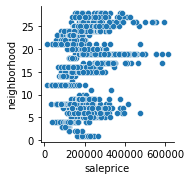

In [69]:
sns.pairplot(ames_train6, y_vars= ['neighborhood'], x_vars = ['saleprice'])

<AxesSubplot:>

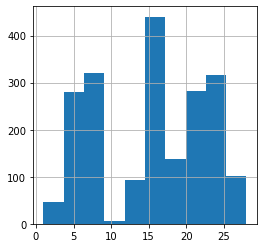

In [70]:
ames_train6['neighborhood'].hist(figsize=(4,4))

In [71]:
ames_train6['neighborhood'].value_counts()

16    310
6     179
21    163
8     139
25    120
19    120
23    111
9     111
20     87
24     86
15     82
4      75
7      70
12     68
17     48
27     47
26     38
22     32
5      27
14     24
1      22
3      19
28     17
18     17
2       6
10      3
11      2
13      1
Name: neighborhood, dtype: int64

Observations: 
Using the histogram we are able to detect the rough value counts for each neighborhood and using value.counts(), we were able to deduce that: 
1. Model based on neighborhood 2,10,11,13 might perform badly due to too little of data.
2. Model based on neighborhood 16 might perform better due to very high amount of data.

In [72]:
ames_train7 = ames_train6

In [73]:
ames_train7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2024 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2024 non-null   int64  
 1   pid              2024 non-null   int64  
 2   ms_subclass      2024 non-null   int64  
 3   ms_zoning        2024 non-null   int64  
 4   lot_frontage     2024 non-null   float64
 5   lot_area         2024 non-null   int64  
 6   street           2024 non-null   int64  
 7   alley            2024 non-null   object 
 8   lot_shape        2024 non-null   object 
 9   land_contour     2024 non-null   int64  
 10  utilities        2024 non-null   int64  
 11  lot_config       2024 non-null   int64  
 12  land_slope       2024 non-null   int64  
 13  neighborhood     2024 non-null   int64  
 14  condition_1      2024 non-null   object 
 15  condition_2      2024 non-null   object 
 16  bldg_type        2024 non-null   object 
 17  house_style   

Trying to understand the relationship for:
1. condition_1
2. condition_2

<AxesSubplot:>

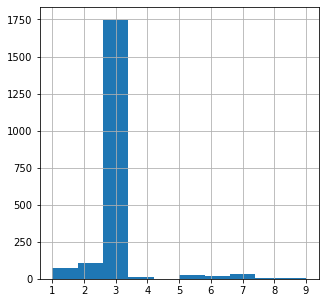

In [74]:
assignindex = dict(enumerate(ames_train7['condition_1'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'condition_1': assignindex})

ames_train7['condition_1'].hist(figsize=(5,5))

<AxesSubplot:>

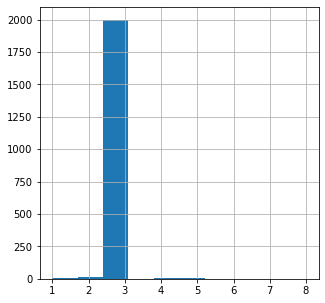

In [75]:
assignindex = dict(enumerate(ames_train7['condition_2'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'condition_2': assignindex})

ames_train7['condition_2'].hist(figsize=(5,5))

<AxesSubplot:>

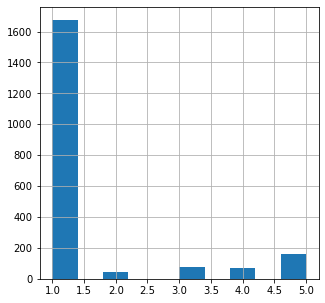

In [76]:
assignindex = dict(enumerate(ames_train7['bldg_type'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'bldg_type': assignindex})

ames_train7['bldg_type'].hist(figsize=(5,5))

<AxesSubplot:>

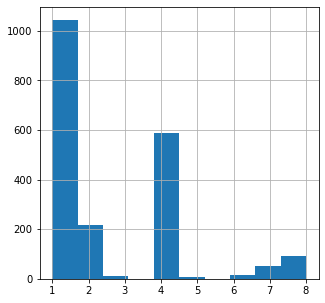

In [77]:
assignindex = {
    1: '1Story',
    2: '1.5Fin',
    3: '1.5Unf',
    4: '2Story',
    5: '2.5Fin',
    6: '2.5Unf',
    7: 'SFoyer',
    8: 'SLvl'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'house_style': assignindex})

ames_train7['house_style'].hist(figsize=(5,5))

<AxesSubplot:>

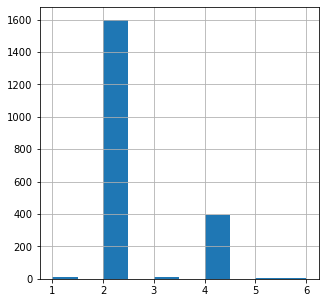

In [78]:
assignindex = dict(enumerate(ames_train7['roof_style'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'roof_style': assignindex})

ames_train7['roof_style'].hist(figsize=(5,5))

<AxesSubplot:>

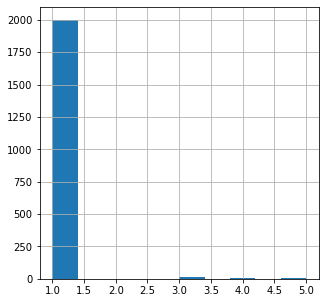

In [79]:
assignindex = dict(enumerate(ames_train7['roof_matl'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'roof_matl': assignindex})

ames_train7['roof_matl'].hist(figsize=(5,5))

<AxesSubplot:>

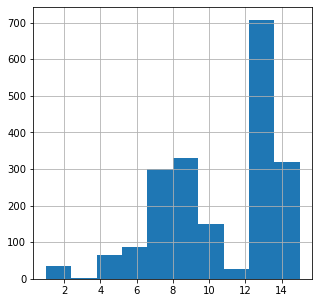

In [80]:
assignindex = dict(enumerate(ames_train7['exterior_1st'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'exterior_1st': assignindex})

ames_train7['exterior_1st'].hist(figsize=(5,5))

<AxesSubplot:>

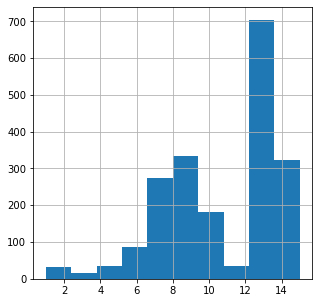

In [81]:
assignindex = dict(enumerate(ames_train7['exterior_2nd'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'exterior_2nd': assignindex})

ames_train7['exterior_2nd'].hist(figsize=(5,5))

<AxesSubplot:>

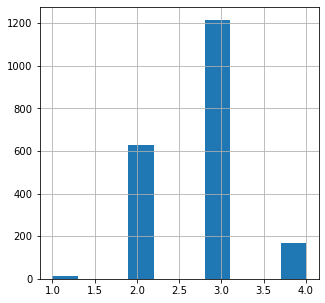

In [82]:
assignindex = dict(enumerate(ames_train7['mas_vnr_type'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'mas_vnr_type': assignindex})

ames_train7['mas_vnr_type'].hist(figsize=(5,5))

<AxesSubplot:>

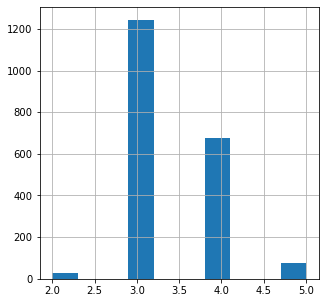

In [83]:
assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'exter_qual': assignindex})

ames_train7['exter_qual'].hist(figsize=(5,5))

<AxesSubplot:>

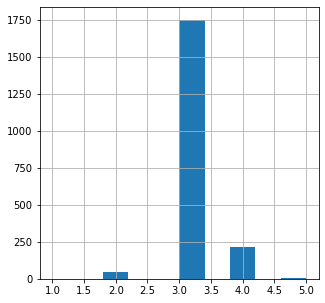

In [84]:
assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'exter_cond': assignindex})

ames_train7['exter_cond'].hist(figsize=(5,5))

<AxesSubplot:>

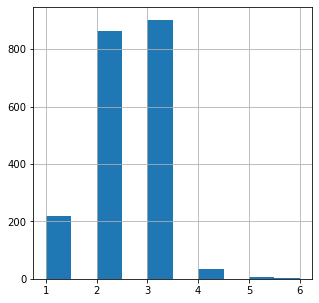

In [85]:
assignindex = dict(enumerate(ames_train7['foundation'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'foundation': assignindex})

ames_train7['foundation'].hist(figsize=(5,5))

<AxesSubplot:>

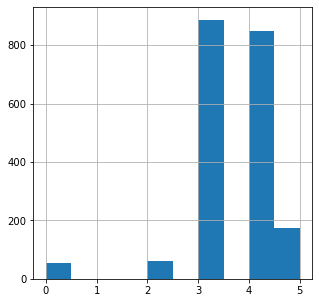

In [86]:
assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'bsmt_qual': assignindex})

ames_train7['bsmt_qual'].hist(figsize=(5,5))

In [87]:
assignindex = {
    5: 'Ex'
    4: 'Gd'
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'bsmt_cond': assignindex})
ames_train7['bsmt_cond'].hist(figsize=(5,5))

SyntaxError: invalid syntax (4041844473.py, line 3)

In [ ]:
assignindex = {
    4: 'Gd',
    3: 'Av',
    2: 'Mn',
    1: 'No',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'bsmt_exposure': assignindex})

ames_train7['bsmt_exposure'].hist(figsize=(5,5))

In [ ]:
assignindex = {
    6: 'GLQ',
    5: 'ALQ',
    4: 'BLQ',
    3: 'Rec',
    2: 'LwQ',
    1: 'Unf',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'bsmtfin_type_1': assignindex})

ames_train7['bsmtfin_type_1'].hist(figsize=(5,5))

In [ ]:
assignindex = {
    6: 'GLQ',
    5: 'ALQ',
    4: 'BLQ',
    3: 'Rec',
    2: 'LwQ',
    1: 'Unf',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'bsmtfin_type_2': assignindex})

ames_train7['bsmtfin_type_2'].hist(figsize=(5,5))

In [ ]:
assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'heating_qc': assignindex})

ames_train7['heating_qc'].hist(figsize=(5,5))

In [ ]:
assignindex = dict(enumerate(ames_train7['heating'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train7 = ames_train7.replace({'heating': assignindex})

ames_train7['heating'].hist(figsize=(5,5))

In [ ]:
ames_train7['heating'].sort_values(ascending=True).unique()

In [ ]:
ames_train7['central_air'] = ames_train7['central_air'].map({'Y':1, 'N':0})
ames_train7['central_air'].hist(figsize=(5,5))

In [ ]:
ames_train8 = ames_train7

In [ ]:
assignindex = {
    5: 'SBrkr',
    4: 'FuseA',
    3: 'FuseF',
    2: 'FuseP',
    1: 'Mix'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'electrical': assignindex})

ames_train8['electrical'].hist(figsize=(5,5))

In [ ]:
# Checking whats the value count for electrical since there is a high concentration between the SBrkr
ames_train8['electrical'].value_counts()

In [ ]:
assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'kitchen_qual': assignindex})

ames_train8['kitchen_qual'].hist(figsize=(5,5))

In [ ]:
assignindex = {
    8: 'Typ',
    7: 'Min1',
    6: 'Min2',
    5: 'Mod',
    4: 'Maj1',
    3: 'Maj2',
    2: 'Sev',
    1: 'Sal'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'functional': assignindex})

ames_train8['functional'].hist(figsize=(5,5))

In [ ]:
# Checking the value count in between Typ to Min2
ames_train8['functional'].value_counts()

In [ ]:
assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'fireplace_qu': assignindex})

ames_train8['fireplace_qu'].hist(figsize=(5,5))

In [ ]:
ames_train8['fireplace_qu'].value_counts()

In [ ]:
assignindex = dict(enumerate(ames_train8['garage_type'].sort_values(ascending=True).unique(),1))
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'garage_type': assignindex})

ames_train8['garage_type'].hist(figsize=(5,5))

In [ ]:
ames_train8['garage_type'].value_counts()

In [ ]:
assignindex = {
    3: 'Fin',
    2: 'RFn',
    1: 'Unf',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'garage_finish': assignindex})

ames_train8['garage_finish'].hist(figsize=(5,5))

In [ ]:
assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'garage_qual': assignindex})

ames_train8['garage_qual'].hist(figsize=(5,5))

In [ ]:
ames_train8.info()

In [ ]:
ames_train8['paved_drive'] = ames_train8['paved_drive'].map({'Y':3, 'P':2, 'N':1})
ames_train8['paved_drive'].value_counts()

In [ ]:
assignindex = {
    4: 'GdPrv',
    3: 'MnPrv',
    2: 'GdWo',
    1: 'MnWw',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'fence': assignindex})

ames_train8['fence'].hist(figsize=(5,5))

In [ ]:
ames_train8['fence'].value_counts()

In [ ]:
assignindex = {
    5: 'Elev',
    4: 'Gar2',
    3: 'Othr',
    2: 'Shed',
    1: 'TenC',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'misc_feature': assignindex})

ames_train8['misc_feature'].hist(figsize=(5,5))

In [ ]:
ames_train8['misc_feature'].value_counts()

In [ ]:
assignindex = {
    2: 'Grvl',
    1: 'Pave',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'alley': assignindex})

ames_train8['alley'].hist(figsize=(5,5))

In [ ]:
ames_train8['alley'].value_counts()

In [ ]:
assignindex = {
    3: 'Reg',
    2: 'IR1',
    1: 'IR2',
    0: 'IR3'}
assignindex = {v: i for i, v in assignindex.items()}
ames_train8 = ames_train8.replace({'lot_shape': assignindex})

ames_train8['lot_shape'].hist(figsize=(5,5))

In [ ]:
ames_train8 = ames_train8.drop(columns=['id','pid'])

In [ ]:
for n in ames_train8:
    print(f'{n} {ames_train8[n].isnull().sum()}')

In [ ]:
ames_train8.to_csv('../datasets/ames_train8.csv')

In [ ]:
ames_train8.hist(figsize=(30,30))

Some observations from the data cleaning:
A high number of the data in catagorial feature is skewed which means more data in one catagory as compared to the others. There is a possibility that some of the features may be used to form a new feature which might give a higher correlation to sale price and this could help the model to generate better prediction.We can foresee some category with assign index might pose problem for EDA.

# Exploratory Data Analysis

Approach : Using the backward selection method to try to identify key features for the model.

In [ ]:
print(ames_train8.corr()['saleprice'].sort_values())

In [ ]:
# Heatmap to find out how all the attributes are related to each other.
matrix = ames_train8.corr()

# Creating mask
mask = np.triu(np.ones_like(matrix.corr()))
 
# plotting a triangle correlation heatmap
plt.figure(figsize=(52,52))
dataplot = sb.heatmap(matrix.corr(), cmap="YlGnBu", annot=True, mask=mask).set(title= 'Heatmap for Correlations between variables')
 
# displaying heatmap
mp.show()

In [ ]:
print(ames_train8.corr()['saleprice'].sort_values()>0.5)

Would plot all the feature against saleprice to see if we can get:
- A rough gauge of the data ranges, outliers, lower and upper range for all features
- For categorial features we will be using boxplots
- For numerical features we will be using scatter plots

In [ ]:
ames_train1.boxplot(by = 'ms_subclass', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'ms_zoning', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'lot_frontage', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['lot_frontage'].value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'lot_area', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Lot Area')
plt.title('Lot Area against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'alley', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'street', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'lot_shape', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'land_contour', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['land_contour'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'utilities', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['utilities'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'lot_config', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['lot_config'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'land_slope', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['land_slope'].value_counts()

In [ ]:
ames_train8.boxplot(by = 'neighborhood', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'condition_1', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['condition_1'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'condition_2', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['condition_2'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'bldg_type', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['bldg_type'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'house_style', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['house_style'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'overall_qual', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'overall_cond', column = ['saleprice'], grid=False)

For Overall_cond and overall_qual:
- Can observe that higher condition and quality sell better

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'year_built', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Year Built')
plt.title('Year Built against Sales Price')

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'year_remod/add', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Year Remod/Add')
plt.title('Year Remod/Add against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'roof_style', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['roof_style'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'roof_matl', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['roof_matl'].value_counts()

In [ ]:
ames_train8.boxplot(by = 'exterior_1st', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['exterior_1st'].value_counts()

In [ ]:
ames_train8.boxplot(by = 'exterior_2nd', column = ['saleprice'], grid=False)

In [ ]:
ames_train['exterior_1st'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'mas_vnr_type', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['mas_vnr_type'].value_counts()

For Mas Vnr Type:
- Better stone can sell higher generally.

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'mas_vnr_area', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Mas Vnr Area')
plt.title('Mas Vnr Area against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'exter_qual', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'exter_cond', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'foundation', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['foundation'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'bsmt_qual', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'bsmt_cond', column = ['saleprice'], grid=False)

For foundation: 
- PConc Poured Contrete seems to be very popular and it fetch higher sale price 
- CBlock Cinder Block 2nd most popular with a mid range sale price.

For Bsmt quality and conditional:
- Higher quality and condition sells higher.
- Thre are no data for condition so data might be slightly bias.

In [ ]:
ames_train1.boxplot(by = 'bsmt_exposure', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'bsmtfin_type_1', column = ['saleprice'], grid=False)

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'bsmtfin_sf_1', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('BsmtFin SF 1')
plt.title('BsmtFin SF 1 against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'bsmtfin_type_2', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['bsmtfin_type_2'].value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'bsmtfin_sf_2', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('BsmtFin SF 2')
plt.title('BsmtFin SF 2 against Sales Price')

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'bsmt_unf_sf', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Bsmt Unf SF')
plt.title('Bsmt Unf SF against Sales Price')

Price is likely to be higher when there is higher unfinished square feet of basement area

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'total_bsmt_sf', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Total Bsmt SF')
plt.title('Total Bsmt SF against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'heating', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'heating_qc', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'central_air', column = ['saleprice'], grid=False)

With central air, air conditioning, sale price is higher

In [ ]:
ames_train1.boxplot(by = 'electrical', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['electrical'].value_counts()

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', '1st_flr_sf', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('1st Flr SF')
plt.title('1st Flr SF against Sales Price')

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', '2nd_flr_sf', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('2nd Flr SF')
plt.title('2nd Flr SF against Sales Price')
# Too much data of the value of 0

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'low_qual_fin_sf', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Low Qual Fin SF')
plt.title('Low Qual Fin SF against Sales Price')

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'gr_liv_area', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Gr Liv Area')
plt.title('Gr Liv Area against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'bsmt_full_bath', column = ['saleprice'], grid=False)
# Generally have mmore basement full bathrooms would result in higher seller price but too little data for 3

In [ ]:
ames_train8['bsmt_full_bath'].value_counts()

In [ ]:
ames_train1.boxplot(by = 'bsmt_half_bath', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'full_bath', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'half_bath', column = ['saleprice'], grid=False)

 For bathroom:
 - Generally have more basement full bathrooms would result in higher seller price but there is too little data for 3.
 - Half price doesnt seem to affect sale price much

In [ ]:
ames_train1.boxplot(by = 'bedroom_abvgr', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'kitchen_abvgr', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'kitchen_qual', column = ['saleprice'], grid=False)

 For kitchen quality:
 - No data for fair and poor kitchen quality. But higher quality kitchen would have higher sale price.
 - Seem like most property have 1 kitchen only hence the sale price for more than 1 kitchen might not be realiable. 

In [ ]:
ames_train1.boxplot(by = 'totrms_abvgrd', column = ['saleprice'], grid=False)

 More rooms above ground would result in higher sales till 11. Generally more totrms, higher the sale price

In [ ]:
ames_train1.boxplot(by = 'functional', column = ['saleprice'], grid=False)

In [ ]:
ames_train8['functional'].value_counts()

In [ ]:
ames_train8.boxplot(by = 'fireplaces', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'fireplace_qu', column = ['saleprice'], grid=False)

For fireplace:
- More fireplaces seems to have higher sale price but too little data for fireplaces
- Higher quality fireplace result in higher sale price. Higher quality and more fireplaces would have higher sale price

In [ ]:
ames_train8.boxplot(by = 'garage_type', column = ['saleprice'], grid=False)

In [ ]:
display(ames_train1['garage_type'].value_counts())
display(ames_train8['garage_type'].value_counts())

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'garage_yr_blt', ames_train1, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Garage Yr Blt')
plt.title('Garage Yr Blt against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'garage_finish', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'garage_cars', column = ['saleprice'], grid=False)

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'garage_area', ames_train1, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Garage Area')
plt.title('Garage Area against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'garage_qual', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'garage_cond', column = ['saleprice'], grid=False)

For garage cond and qual:
- Sales price increases generally with garage quality. There might be a lack of data for anything more than 'good'.
- Both garage condition and quality will sell higher. Bigger garage will also sell higher.

In [ ]:
ames_train1.boxplot(by = 'paved_drive', column = ['saleprice'], grid=False)

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'wood_deck_sf', ames_train1, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Wood Deck SF')
plt.title('Wood Deck SF against Sales Price')

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'open_porch_sf', ames_train1, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Open Porch SF')
plt.title('Open Porch SF against Sales Price')

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'enclosed_porch', ames_train1, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Enclosed Porch ')
plt.title('Enclosed Porch against Sales Price')

Enclosed porch pattern has alot of 0 values which means many property does not have any enclosed porched.

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', '3ssn_porch', ames_train1, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('3Ssn Porch')
plt.title('3Ssn Porch against Sales Price')

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'screen_porch', ames_train1, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Screen Porch')
plt.title('Screen Porch against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'fence', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'misc_feature', column = ['saleprice'], grid=False)

For fence:
- With or without fence doesnt affect the sale price

For misc feature:
- There isnt any data for elev and elevator

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot('saleprice', 'misc_val', ames_train8, ci=None,
           scatter_kws = {'s':1},
           line_kws = {'color': 'red'})
plt.xlabel('Salesprice')
plt.ylabel('Misc Val')
plt.title('Misc Val against Sales Price')

In [ ]:
ames_train1.boxplot(by = 'mo_sold', column = ['saleprice'], grid=False)

In [ ]:
ames_train1.boxplot(by = 'yr_sold', column = ['saleprice'], grid=False)

For month and year:
- Month sold, doesnt seems to have an impact on sales prices
- Year sold similar to month, doesnt seems to have an impact on sales prices

In [ ]:
ames_train1.boxplot(by = 'sale_type', column = ['saleprice'], grid=False)

In [ ]:
ames_train1['sale_type'].value_counts()

EDA Summary:



# Feature Engineering

In [ ]:
#ames_train5
ames_train8.columns

ames_train9 = ames_train5.drop(columns=['id','pid'])
ames_train9['ms_zoning'] = ames_train1['ms_zoning']
ames_train9['street'] = ames_train1['street']
ames_train9['neighborhood'] = ames_train1['neighborhood']
ames_train9['exter_qual'] = ames_train8['exter_qual']
ames_train9['exter_cond'] = ames_train8['exter_cond']
ames_train9['bsmt_qual'] = ames_train8['bsmt_qual']
ames_train9['bsmt_cond'] = ames_train8['bsmt_cond']
ames_train9['bsmt_exposure'] = ames_train8['bsmt_exposure']
ames_train9['bsmtfin_type_1'] = ames_train8['bsmtfin_type_1']
ames_train9['bsmtfin_type_2'] = ames_train8['bsmtfin_type_2']
ames_train9['heating_qc'] = ames_train8['heating_qc']
ames_train9['kitchen_qual'] = ames_train8['kitchen_qual']
ames_train9['fireplace_qu'] = ames_train8['fireplace_qu']
ames_train9['garage_finish'] = ames_train8['garage_finish']
ames_train9['garage_qual'] = ames_train8['garage_qual']
ames_train9['garage_cond'] = ames_train8['garage_cond']
ames_train9['functional'] = ames_train8['functional']

In [ ]:
ames_train8 = ames_train9
ames_train9.columns

In [ ]:
# Safe guard
ames_train10 = ames_train9

In [ ]:
ames_train10.info()

In [ ]:
ames_train5.groupby('heating')['saleprice'].mean()

We would want to numarise 'heating' to perform the calculation between the column 'heating' and 'heating_qc':
- Average saleprice / total average
- GasA = 181869.200402/601224.2004018081
- GasW = 151275/601224.2004018081
- Grav = 65180/601224.2004018081
- OthW = 125750.000000/601224.2004018081
- Wall = 77150.000000/601224.2004018081
Assigning back the value into 'heating'

In [ ]:
assignindex = {
    181869.200402/601224.2004018081: 'GasA',
    151275/601224.2004018081: 'GasW',
    65180/601224.2004018081: 'Grav',
    125750.000000/601224.2004018081: 'OthW',
    77150.000000/601224.2004018081: 'Wall'}
assignindex = {v: k for k, v in assignindex.items()}
ames_train10 = ames_train10.replace({'heating': assignindex})

In [ ]:
display(ames_train9['exter_qual'])

Using ames_train10 , we will attempt to combine some new columns feature by joining old features and removal of some old features. For example after we combined 'overall qual' and 'overall cond' , we must remove these features for the new feature (overall_qual_cond). And we would need to assign the relevant index to the relevant columns.

In [ ]:
# Combining Exter Qual and Exter Cond data into 1 column
ames_train10['exter_qual_cond'] = ames_train10['exter_qual'] * ames_train10['exter_cond']
ames_train10 = ames_train10.drop(columns=['exter_qual','exter_cond'])

# Combining Bsmt Qual and Bsmt Cond and Bsmt Exposure into 1 column
ames_train10['bsmt_qual_cond_exposure'] = ames_train10['bsmt_qual'] * ames_train10['bsmt_cond'] * ames_train10['bsmt_exposure']
ames_train10 = ames_train10.drop(columns=['bsmt_qual','bsmt_cond', 'bsmt_exposure'])

# Combining Overall Qual and Overall Cond data into 1 column
ames_train10['overall_qual_cond'] = ames_train10['overall_qual'] * ames_train10['overall_cond']
ames_train10 = ames_train10.drop(columns=['overall_qual','overall_cond'])

# Combining all basement values to 1 column
ames_train10['bsmt']=ames_train10['bsmtfin_type_1']*ames_train10['bsmtfin_sf_1']+ames_train10['bsmtfin_type_2']*ames_train10['bsmtfin_sf_2']+((ames_train10['bsmt_unf_sf']+ames_train10['total_bsmt_sf'])*ames_train10['bsmt_qual_cond_exposure'])  
ames_train10 = ames_train10.drop(columns=['bsmt_qual_cond_exposure','bsmtfin_type_1', 'bsmtfin_sf_1','bsmtfin_type_2', 'bsmtfin_sf_2','bsmt_unf_sf', 'total_bsmt_sf', 'bsmt_qual_cond_exposure'])

# Combining Heating and Heating QC
ames_train10['heatingmod'] = ames_train10['heating'] * ames_train10['heating_qc']
ames_train10 = ames_train10.drop(columns=['heating','heating_qc'])

# Combining Kitchen and Kitchen Qual data into 1 column
ames_train10['kitchen_and_qual'] = ames_train10['kitchen_qual'] * ames_train10['kitchen_abvgr']
ames_train10 = ames_train10.drop(columns=['kitchen_abvgr','kitchen_qual'])

# Combining Fireplaces and Fireplace Qu data into 1 column
ames_train10['fireplaces_and_qual'] = ames_train10['fireplace_qu'] * ames_train10['fireplaces']
ames_train10 = ames_train10.drop(columns=['fireplaces','fireplace_qu'])

# Combining Garage Area, Garage Qual, Garage finish and Garage Cond data into 1 column
ames_train10['garage'] = ames_train10['garage_cond'] * ames_train10['garage_qual']* ames_train10['garage_area']*ames_train10['garage_finish'] *ames_train10['garage_cars'] 
ames_train10 = ames_train10.drop(columns=['garage_cond','garage_qual', 'garage_area', 'garage_finish', 'garage_cars'])

# Combining Open Porch SF, 3-Ssn Porch, Screen Porch data into 1 column
# Drop Enclosed Porch column
ames_train10['porch_total'] = ames_train10['open_porch_sf'] + ames_train10['3ssn_porch'] + ames_train10['screen_porch']
ames_train10 = ames_train10.drop(columns=['open_porch_sf','3ssn_porch','screen_porch', 'enclosed_porch'])

# Combining year built and year sold to age
ames_train10['age'] = ames_train10['yr_sold'] - ames_train10['year_built']
ames_train10 = ames_train10.drop(columns=['year_built','yr_sold'])

assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po'}
assignindex = {v: i for i, v in assignindex.items()}
ames_test = ames_test.replace({'exter_qual': assignindex})


assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po'}
assignindex = {v: i for i, v in assignindex.items()}
ames_test= ames_test.replace({'exter_cond': assignindex})

assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None'}

assignindex = {v: i for i, v in assignindex.items()}
ames_test= ames_test.replace({'bsmt_qual': assignindex})


assignindex = { 
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None',}
assignindex = {v: i for i, v in assignindex.items()}
ames_test = ames_test.replace({'bsmt_cond': assignindex})


assignindex = {
    4: 'Gd',
    3: 'Av',
    2: 'Mn',
    1: 'No',
    0: 'None',}
assignindex = {v: i for i, v in assignindex.items()}
ames_test = ames_test.replace({'bsmt_exposure': assignindex})

assignindex = {
    6: 'GLQ',
    5: 'ALQ',
    4: 'BLQ',
    3: 'Rec',
    2: 'LwQ',
    1: 'Unf',
    0: 'None',}
assignindex = {v: i for i, v in assignindex.items()}
ames_test = ames_test.replace({'bsmtfin_type_1': assignindex})


assignindex = {
    6: 'GLQ',
    5: 'ALQ',
    4: 'BLQ',
    3: 'Rec',
    2: 'LwQ',
    1: 'Unf',
    0: 'None',}
assignindex = {v: i for i, v in assignindex.items()}
ames_test= ames_test.replace({'bsmtfin_type_2': assignindex})


assignindex = {
    181869.200402/601224.2004018081: 'GasA',
    151275/601224.2004018081: 'GasW',
    65180/601224.2004018081: 'Grav',
    125750.000000/601224.2004018081: 'OthW',
    77150.000000/601224.2004018081: 'Wall'}
assignindex = {v: k for k, v in assignindex.items()}
ames_train10 = ames_train10.replace({'heating': assignindex})


assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po'}
assignindex = {v: i for i, v in assignindex.items()}
ames_test = ames_test.replace({'kitchen_qual': assignindex})

assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_test = ames_test.replace({'fireplace_qu': assignindex})

assignindex = {
 3: 'Fin',
 2: 'RFn',
 1: 'Unf',
 0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_test = ames_test.replace({'garage_finish': assignindex})

assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_test= ames_test.replace({'garage_qual': assignindex})

assignindex = {
    5: 'Ex',
    4: 'Gd',
    3: 'TA',
    2: 'Fa',
    1: 'Po',
    0: 'None'}
assignindex = {v: i for i, v in assignindex.items()}
ames_test= ames_test.replace({'garage_cond': assignindex})

assignindex = {
    8: 'Typ',
    7: 'Min1',
    6: 'Min2',
    5: 'Mod',
    4: 'Maj1',
    3: 'Maj2',
    2: 'Sev',
    1: 'Sal'}
assignindex = {v: i for i, v in assignindex.items()}
ames_test= ames_test.replace({'functional': assignindex})